In [1]:
import requests
from bs4 import BeautifulSoup as b

headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})

In [2]:
# Retrieve the artist's page

base_link = 'http://www.absolutelyrics.com/lyrics/artist/taylor_swift'

page = requests.get(base_link)

In [3]:
soup = b(page.content, "html.parser")

In [4]:
lyric_base = 'http://www.absolutelyrics.com'

all_album_links = soup.find_all('li', class_='artist_albumlistitem')
all_album_links = [a.find('div', class_='artist_albumsonglist').find_all('li') for a in all_album_links]

In [5]:
lyric_base = 'http://www.absolutelyrics.com'

all_album_links = soup.find_all('li', class_='artist_albumlistitem')
all_album_links = [(a.find('div', class_ = 'artist_albuminfo').find('h3').text[:-8], a.find('div', class_='artist_albumsonglist').find_all('li')) for a in all_album_links]

In [6]:
# Create a tuple containing the album name, song title, and url

all_links = [(a[0], b) for a in all_album_links for b in a[1]]
all_links = [(a[0], a[1].find('a')) for a in all_links]
# Remove songs not assigned to any album
# Create path to lyric page
all_links = [(a[0], a[1].text[11:], lyric_base + a[1]['href']) for a in all_links if a[1] is not None and "unkno" not in a[0]]
all_links

[('Evermore',
  'Willow',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/willow'),
 ('Evermore',
  'Champagne Problems',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/champagne_problems'),
 ('Evermore',
  'Gold Rush',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/gold_rush'),
 ('Evermore',
  "'Tis The Damn Season",
  "http://www.absolutelyrics.com/lyrics/view/taylor_swift/'tis_the_damn_season"),
 ('Evermore',
  'Tolerate It',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/tolerate_it'),
 ('Evermore',
  'No Body, No Crime',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/no_body,2c_no_crime'),
 ('Evermore',
  'Happiness',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/happiness'),
 ('Evermore',
  'Dorothea',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/dorothea'),
 ('Evermore',
  'Coney Island',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/coney_island'),
 ('Evermore',
  'Ivy',
  'http://www.abs

In [7]:
import time 
import numpy as np 
from tqdm import tqdm 

all_songs = []

# Access song page through the second items all_links
# Extract the lyrics 
# Create song dictionaries 
for link in tqdm(all_links): 
    page = requests.get(link[2])
    soup = b(page.content, 'html.parser')

    lyrics = soup.find('p', {'id': 'view_lyrics'}).text

    song = {
        'album': link[0],
        'title': link[1],
        'lyrics': lyrics
    }

    all_songs.append(song.copy())

all_songs

100%|██████████| 157/157 [00:58<00:00,  2.68it/s]


[{'album': 'Evermore',
  'title': 'Willow',
  'lyrics': "\n\tI'm like the water when your ship rolled in that night\nRough on the surface but you cut through like a knife\nAnd if it was an open/shut case\nI never would've known from that look on your face\nLost in your current like a priceless wine\n\nThe more that you say, the less I know\nWherever you stray, I follow\nI'm begging for you to take my hand\nWreck my plans, that's my man\n\nLife was a willow and it bent right to your wind\nHead on the pillow, I could feel you sneaking in\nAs if you were a mythical thing\nLike you were a trophy or a champion ring\nAnd there was one prize I'd cheat to win\n\nThe more that you say, the less I know\nWherever you stray, I follow\nI'm begging for you to take my hand\nWreck my plans, that's my man\nYou know that my train could take you home\nAnywhere else is hollow\nI'm begging for you to take my hand\nWreck my plans, that's my man\n\nLife was a willow and it bent right to your wind\nThey count

In [8]:
import json
with open('./data.json', 'w') as f: 
    json.dump(all_songs, f)

In [9]:
import json
with open('./data.json', 'r') as f: 
    loaded_songs = json.load(f)

In [10]:
import re

# Clean the lyrics
def process_lyrics(song): 
    words = song['lyrics']
    words = re.sub('[\(\[].*?[\)\]]', '', words)
    words = words.replace('<br />', '')
    words = words.replace('\n', ' ')
    words = words.replace('\t', '')
    words = words.replace('+', '')
    words = re.sub(r'[^\w\s]', '', words)
    words = words.replace('\'', '')
    words = words.replace('"', '')
    words = words.replace('\r', '')
    words = words.replace('f_ck', 'fuck')
    words = words.replace('f_cked', 'fucked')
    words = words.replace('sh_t', 'shit')
    words = words.replace('b_tch', 'bitch')
    words = words.replace('b_ttons', 'buttons')
    words = words.replace('b_tt', 'butt')
    words = " ".join(words.split())
    words = words.replace('8197', ' ')
    words = words.strip().lower()
    song['lyrics'] = words
    return song

loaded_songs = [process_lyrics(song) for song in loaded_songs]
loaded_songs

[{'album': 'Evermore',
  'title': 'Willow',
  'lyrics': 'im like the water when your ship rolled in that night rough on the surface but you cut through like a knife and if it was an openshut case i never wouldve known from that look on your face lost in your current like a priceless wine the more that you say the less i know wherever you stray i follow im begging for you to take my hand wreck my plans thats my man life was a willow and it bent right to your wind head on the pillow i could feel you sneaking in as if you were a mythical thing like you were a trophy or a champion ring and there was one prize id cheat to win the more that you say the less i know wherever you stray i follow im begging for you to take my hand wreck my plans thats my man you know that my train could take you home anywhere else is hollow im begging for you to take my hand wreck my plans thats my man life was a willow and it bent right to your wind they count me out time and time again life was a willow and it 

In [11]:
import pandas as pd

df = pd.DataFrame(loaded_songs)
df.head()

,album,title,lyrics
0,Evermore,Willow,im like the water when your ship rolled in tha...
1,Evermore,Champagne Problems,you booked the night train for a reason so you...
2,Evermore,Gold Rush,gleaming twinkling eyes like sinking ships on ...
3,Evermore,'Tis The Damn Season,if i wanted to know who you were hanging with ...
4,Evermore,Tolerate It,i sit and watch you reading with your head low...


In [12]:
# Number of songs in each album
df['album'].value_counts()

Lover                                                        18
Evermore                                                     17
Folklore                                                     17
Speak Now                                                    17
1989                                                         16
Red                                                          16
Fearless                                                     16
Reputation                                                   15
Taylor Swift                                                 14
Sounds of the Season: The Taylor Swift Holiday Collection     6
Beautiful Eyes                                                5
Name: album, dtype: int64

In [13]:
df['title'] = df['title'].apply(lambda x: str(x).strip('\"'))
df['album'] = df['album'].apply(lambda x: str(x).strip('\"'))
df['lyrics'] = df['lyrics'].apply(lambda x: str(x).strip('\"'))

In [14]:
import nltk
from nltk.corpus import stopwords

swords = stopwords.words('english')
swords += ['im', 'like', 'youre', 'dont']
swords = [sword.replace("'", "") for sword in swords]
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [15]:
top_counts = pd.Series([word for word in " ".join(df['lyrics'].tolist()).split(" ") if word not in swords]).value_counts()
top_counts

know        430
never       304
love        248
time        230
cause       228
           ... 
swung         1
arrow         1
blanks        1
filling       1
unbroken      1
Length: 3256, dtype: int64

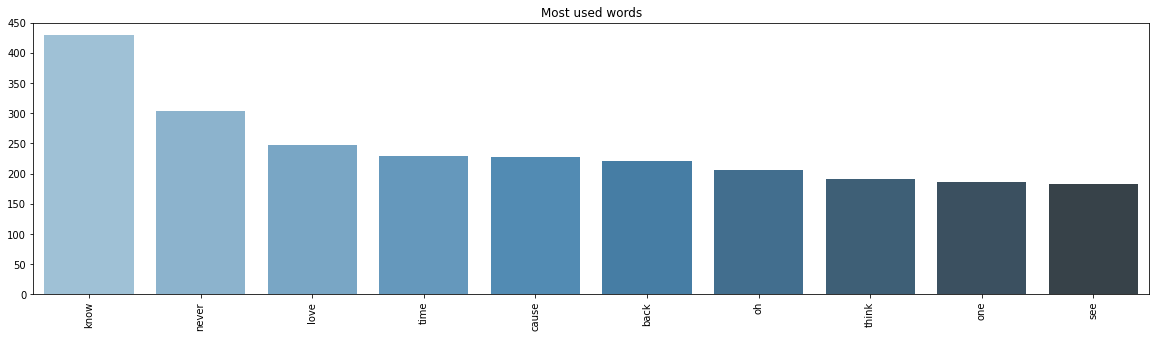

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot of the 10 most common words in all albums
plt.figure(figsize=(20, 5))
sns.barplot(x=top_counts.index[:10], y=top_counts[:10], palette='Blues_d')
plt.title('Most used words')
plt.ylim(ymin=0,ymax=450)
plt.xticks(rotation=90)
plt.show()

In [17]:
# Sentiment Analysis of lyrics using VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer() 
df['scores'] = df['lyrics'].apply(lambda l: sid.polarity_scores(l)['compound'])
df['sentiment'] = df['scores'].apply(lambda x: 'positive' if x >= 0 else 'negative')
df.head()

,album,title,lyrics,scores,sentiment
0,Evermore,Willow,im like the water when your ship rolled in tha...,0.9776,positive
1,Evermore,Champagne Problems,you booked the night train for a reason so you...,-0.5210,negative
2,Evermore,Gold Rush,gleaming twinkling eyes like sinking ships on ...,0.9979,positive
3,Evermore,'Tis The Damn Season,if i wanted to know who you were hanging with ...,-0.6185,negative
4,Evermore,Tolerate It,i sit and watch you reading with your head low...,0.9931,positive


In [18]:
df['sentiment'].value_counts() 

positive    110
negative     47
Name: sentiment, dtype: int64

In [19]:
red_df = df[df['album']=='Red']

In [20]:
red_df.head(20)

,album,title,lyrics,scores,sentiment
83,Red,State of Grace,im walking fast through the traffic lights bus...,0.9884,positive
84,Red,Red,loving him is like driving a new maserati down...,0.9979,positive
85,Red,Treacherous,put your lips close to mine as long as they do...,-0.9659,negative
86,Red,I Knew You Were Trouble,once upon a time a few mistakes ago i was in y...,-0.9992,negative
87,Red,All Too Well,i walked through the door with you the air was...,0.9905,positive
88,Red,22,it feels like a perfect night to dress up like...,0.9968,positive
89,Red,I Almost Do,i bet this time of night youre still up i bet ...,0.8484,positive
90,Red,We Are Never Ever Getting Back Together,i remember when we broke up the first time say...,0.9952,positive
91,Red,Stay Stay Stay,im pretty sure we almost broke up last night i...,0.5598,positive
92,Red,The Last Time,found myself at your door just like all those ...,0.7319,positive


In [21]:
common_words = pd.Series([word for word in " ".join(red_df['lyrics'].tolist()).split(" ") if word not in swords]).value_counts()
common_words

know         75
time         54
oh           50
never        50
ever         34
             ..
self          1
paralyzed     1
fly           1
paper         1
whats         1
Length: 717, dtype: int64

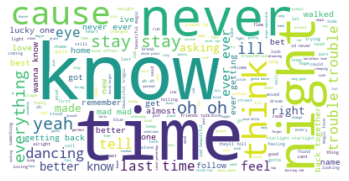

In [22]:
# Red lyrics wordcloud
from wordcloud import WordCloud, STOPWORDS

text = " ".join(words for words in red_df.lyrics)
wordcloud = WordCloud(background_color='white', stopwords=swords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 1440x1080 with 0 Axes>

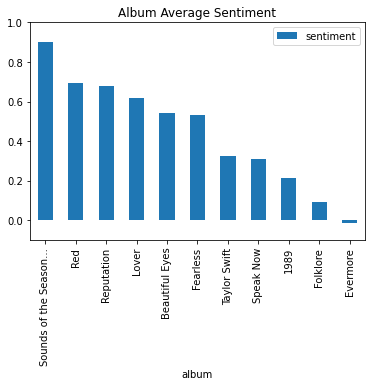

In [23]:
album_list = [a[0] for a in all_album_links]
album_list = album_list[:-1]

df_dict = {}
names = []
means = []

for a in album_list:
    df_dict[a] = df[df['album'] == a]
    names = names + [a]
    means = means + [df_dict[a]['scores'].mean()]

df_avg_score = pd.DataFrame({'album' : names, 'sentiment' : means})
df_avg_score = df_avg_score.set_index('album').sort_values('sentiment', ascending = False)

df_avg_score_plot = df_avg_score.reset_index()
df_avg_score_plot.iloc[0, 0] = 'Sounds of the Season...'
df_avg_score_plot = df_avg_score_plot.set_index('album')

plt.figure(figsize = (20, 15))
df_avg_score_plot.plot.bar()
plt.title('Album Average Sentiment')
plt.ylim(ymin=-0.1,ymax=1)
plt.xticks(rotation=90)
plt.show()